In [39]:
import os
import pandas as pd
import numpy as np
import itertools
import scipy
import matplotlib.pyplot as plt

import pickle


In [40]:
def list_maker(*data_, data_21, data_42, data_64, data_128, eje ):
    
    data = []
    for ele in data_:
        data = data +  [ data_[eje][i] for i in range(len(ele[0])) ]

    Data = np.array(data)
    Data = np.sum(Data, axis=0)/len(data_)
    
    return Data.tolist()

def MinMaxscaler(x, x_min, x_max):
    return [(x[i] - x_min) / (x_max - x_min) for i in range(len(x))]

list_of_names = [ "coverage", "inefficiency", 
                    "certainty", "uncertainty", "mistrust",
                    "S_score", "F_score", "Creditibily"]


def plot_comparison(OUT, list_of_names, N_classes):

    # read the dictionary from the file
    with open(r'../DATA/' +  OUT +'.pickle', 'rb') as f:
        OUT = pickle.load(f)



    data_mean = {}
    data_std = {}

    for i in range(0, len( list_of_names)):
        data_mean[list_of_names[i]] = []
        data_std[list_of_names[i]] = []

    for ele in OUT:

        keys = list(ele.keys())
        values = list(ele.keys())

        x = [*range(1 , len(ele["inefficiency"]) + 1)]

        #for i in range(len(values[0])):

        for name in list_of_names:
            

            if name != "inefficiency":
                
                data_mean[name] += [ele[name]]
            else:
                
                data_mean[name] += [MinMaxscaler(ele[name], 1, N_classes)]
                
    return data_mean, data_std, x

coverage 0.9068181818181819
inefficiency 0.1964015151515152
certainty 0.39431818181818185
uncertainty 0.0
mistrust 0.010227272727272724
S_score 0.7363896599583623
F_score 0.19462179042331712
Creditibily 0.5417678695350452
coverage 0.9039772727272728
inefficiency 0.19564393939393937
certainty 0.39147727272727273
uncertainty 0.0
mistrust 0.011931818181818179
S_score 0.7336181471200556
F_score 0.19420975017349068
Creditibily 0.539408396946565


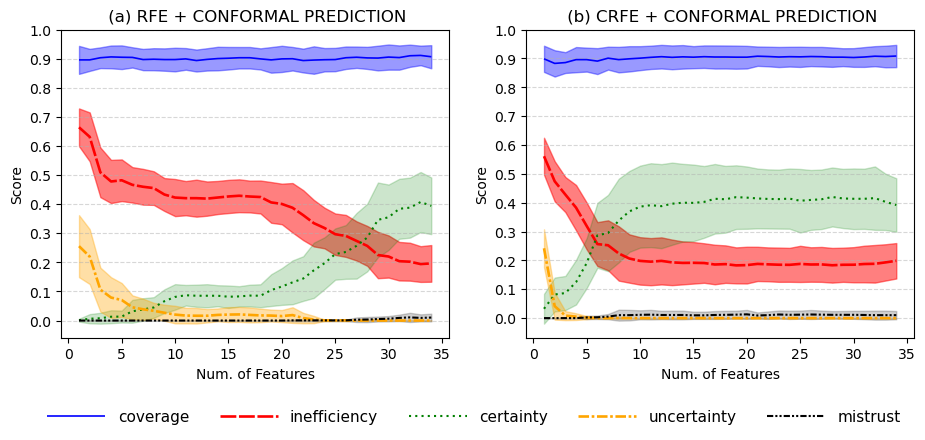

<Figure size 640x480 with 0 Axes>

In [42]:


RFE_file =  "RFE_both_30"
CRFE_file =  "CRFE_both_30"
N_of_classes = 4


list_of_colors = ["blue", "red", "green", "orange", "black" ]
list_of_styles = ['-','--', '-.', ":" , ":"]
list_of_dots = ["*", "+", "*", "+", "*"]
list_of_w = [1.2, 1.9, 1.5, 1.9, 1.5]
list_of_dashes = [(1,0), (6,1), (1,2), (4,1,1,1), (3,1,1,1,1,1)]
list_of_intensities = [0.40 , 0.50 , 0.20 , 0.35 , 0.19]

data_mean, data_std, x = plot_comparison(RFE_file, list_of_names, N_of_classes )


#fig = plt.figure(figsize=(4, 3), dpi=300)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
# Create the common legend


#fig, ax = plt.subplots()
i = 0
for name in list_of_names:


    mean = np.mean(np.array(data_mean[name]), axis=0).tolist()
    std_dev = np.std(np.array(data_mean[name]), axis=0).tolist()
    
    data_mean[name] = mean 
    #std_dev = sem(result)
    data_std[name] = std_dev

    print(name,  data_mean[name][len(data_mean[name])-34] )

    if name in ["S_score", "F_score", "Creditibily"]:
        
        pass
    else:
        
        rev_list = data_mean[name]
        rev_list.reverse()
        rev_std = data_std[name]
        rev_std.reverse()
        ax1.plot(x, rev_list,
                    label = name, dashes=list_of_dashes[i],
                    markersize=2.5, color = list_of_colors[i],  
                    linestyle="--", linewidth=list_of_w[i])
        
        #ax.errorbar(x, rev_list , yerr=data_std[name], 
                    #label = name, fmt=list_of_simbols[i],
                    #markersize=2.5, color = list_of_colors[i],  
                    #linestyle='-', linewidth=1)
        
        ax1.fill_between(x, np.array(rev_list) + np.array(rev_std),
                         np.array(rev_list) - np.array(rev_std), 
                         color= list_of_colors[i], alpha=list_of_intensities[i])
        
        i = i + 1


ax1.set_xlabel("Num. of Features")
ax1.set_ylabel("Score")

y_min, y_max = ax1.get_ylim()
y_padding = 0.00005 * (y_max - y_min)
ax1.set_ylim(y_min - y_padding, y_max + y_padding)

# Add grid lines
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_yticks([i/10 for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1

        
        
 
data_mean, data_std, x = plot_comparison(CRFE_file, list_of_names,  N_of_classes)


i = 0
for name in list_of_names:


    mean = np.mean(np.array(data_mean[name]), axis=0).tolist()
    std_dev = np.std(np.array(data_mean[name]), axis=0).tolist()
    
    data_mean[name] = mean 
    #std_dev = sem(result)
    data_std[name] = std_dev

    print(name, data_mean[name][len(data_mean[name])-11])

    if name in ["S_score", "F_score", "Creditibily"]:
        
        pass
    else:
        
        rev_list = data_mean[name]
        rev_list.reverse()
        rev_std = data_std[name]
        rev_std.reverse()
        ax2.plot(x, rev_list,
                    label = name, dashes=list_of_dashes[i],
                    markersize=2.5, color = list_of_colors[i],  
                    linestyle="--", linewidth=list_of_w[i])
        #ax.errorbar(x, rev_list , yerr=data_std[name], 
                    #label = name, fmt=list_of_simbols[i],
                    #markersize=2.5, color = list_of_colors[i],  
                    #linestyle='-', linewidth=1)
        
        ax2.fill_between(x, np.array(rev_list) + np.array(rev_std),
                         np.array(rev_list) - np.array(rev_std), 
                         color= list_of_colors[i], alpha=list_of_intensities[i])
        
        i = i + 1

ax2.set_xlabel("Num. of Features")
ax2.set_ylabel("Score")

y_min, y_max = ax2.get_ylim()
y_padding = 0.00005 * (y_max - y_min)
ax2.set_ylim(y_min - y_padding, y_max + y_padding)

# Add grid lines
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.set_yticks([i/10 for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1

ax1.set_title(' (a) RFE + CONFORMAL PREDICTION')
ax2.set_title(' (b) CRFE + CONFORMAL PREDICTION')

handles, labels = [], []

h, l = ax2.get_legend_handles_labels()
handles += h
labels += l

fig.legend(handles, labels, loc='lower center', ncol=5, frameon=False, handlelength=3.8, fontsize=11, bbox_to_anchor=(0.5, -0.14))

plt.savefig('../plots/both_30.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.clf()